In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk

**Reading the SMS data and checking the length of messages**

In [ ]:
import pandas
df_sms = pd.read_csv('spam.csv',encoding='latin-1')
df_sms.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df_sms.tail()

,label,sms
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
#Number of observations in each label spam and ham
df_sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
df_sms.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Let's add the length column in the Dataframe for each message

In [ ]:
df_sms['length'] = df_sms['sms'].apply(len)
df_sms.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
print (f"Maximum length of SMS is {max(df_sms['length'])}")

Maximum length of SMS is 910


In [ ]:
print (f"Minimim length of SMS is {min(df_sms['length'])}")

Minimim length of SMS is 2


Let's visualize the lengths of sms for a better understanding

Text(0, 0.5, 'Frequency')

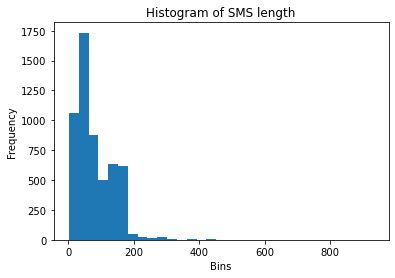

In [ ]:
import matplotlib.pyplot as plt

data = list(df_sms['length'])
binsize = 30
plt.hist(data, bins=range(min(data), max(data) + binsize, binsize))

plt.title('Histogram of SMS length')
plt.xlabel("Bins")
plt.ylabel("Frequency")

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

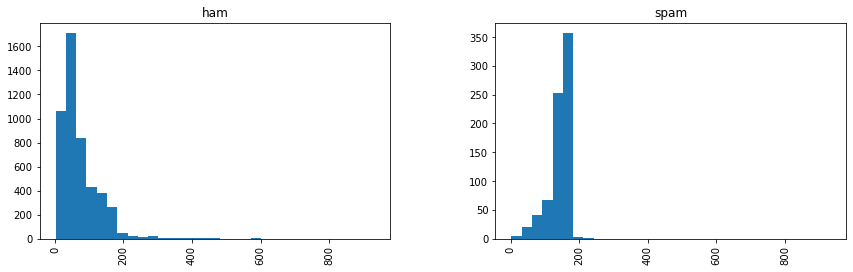

In [ ]:
df_sms.hist(column='length', by='label', bins=range(min(data), max(data) + binsize, binsize),figsize=(14,4))

Let's go ahead and replace Ham and Spam to 0 and 1 for ease of operation.

In [ ]:
#replace ham with 0 and spam with 1
df_sms.loc[:,'label'] = df_sms.label.map({'ham':0, 'spam':1})
print(df_sms.shape)
df_sms.head()

(5572, 3)


,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


Plotting each label to get an idea of skewness in the data.

ham     4825
spam     747
Name: label, dtype: int64


<AxesSubplot:>

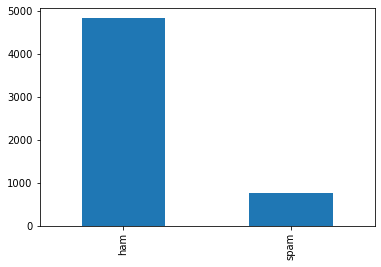

In [ ]:
import seaborn as sns
import numpy as np
df_texts = pd.read_csv('spam.csv',encoding='latin-1')
df_texts.head()
labels = df_texts['label'].value_counts()
print(labels)
labels.plot(kind='bar')

In [ ]:
df_texts['sms'].describe()

count                       5572
unique                      5169
top       Sorry, I'll call later
freq                          30
Name: sms, dtype: object

Below we'll be tokenizing words to get the word frequency and then that we would be feeding to Naive Bayes for classification.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

Before generating the document-term matrix, let's separate the SMS data into train and test splits

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_sms['sms'], 
                                                    df_sms['label'],test_size=0.20, 
                                                    random_state=1)


In [ ]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. 
testing_data = count_vector.transform(X_test)

In [ ]:
print (training_data.shape)

(4457, 7777)


In [ ]:
print (testing_data.shape)

(1115, 7777)


Using  sklearns **sklearn.naive_bayes** method to make predictions on our dataset.

Specifically, using **multinomial Naive Bayes** implementation. This particular classifier is suitable for classification with discrete features (such as in our case, word counts for text classification). It takes in integer word counts as its input. On the other hand **Gaussian Naive Bayes** is better suited for continuous data as it assumes that the input data has a Gaussian (normal) distribution.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

MultinomialNB()

In [ ]:
#Make prediction on test dataset
predictions = naive_bayes.predict(testing_data)

Let's evaluate our model now.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.9847533632286996
Precision score: 0.9420289855072463
Recall score: 0.935251798561151
F1 score: 0.9386281588447652
